In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

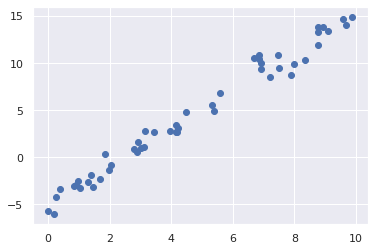

In [2]:
### Simple Linear Regression

np.random.seed(1)  # set the random seed
rng = np.random    # for convenience   rng.rand()  = np.random.rand()
x = 10 * rng.rand(50)   # .rand(n) generate n ~ U(0,1)
y = 2 * x - 5 + rng.randn(50)  # .randn(n) generate n ~ N(0,1)
# if you want to change the s.d. of the normal r.v, you can use rng.normal(scale=sd, size=n)
plt.scatter(x, y);

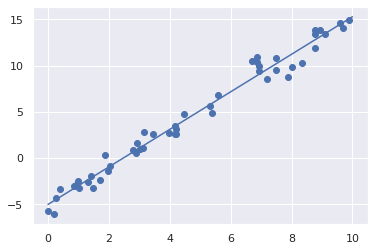

In [3]:
# We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y) # np.newaxis: add a dimension  make x  (50 x 1) matrix  from 50-dim vec

xfit = np.linspace(0, 10, 1000)  #  in R: xfit=seq(0,10,len=1000)  , for plotting
yfit = model.predict(xfit[:, np.newaxis])  # fit the new data "xfit"

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


In [5]:
### Multiple Linear Regression
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

y = 0.5 + np.dot(X, [1.5, -2., 1.]) + rng.randn(100)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.49999999999999556
[ 1.5 -2.   1. ]
0.5223152386536221
[ 1.49049285 -2.06526696  1.06020821]


In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x=torch.tensor(range(5)).reshape(-1,1)+1

y=torch.cat([x,5*x],1)
print(y)
print(y.T.mm(y))
z= y.T.mm(y)
print(z.inverse())

tensor([[ 1,  5],
        [ 2, 10],
        [ 3, 15],
        [ 4, 20],
        [ 5, 25]])
tensor([[  55,  275],
        [ 275, 1375]])


RuntimeError: ignored

In [7]:
print((z+0.5*torch.ones(2,2)).inverse())

tensor([[ 3.1261, -0.6261],
        [-0.6261,  0.1261]])


In [8]:
### Polynomial Regression - from scratch with PyTorch
import torch
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Generate Data

# Defining the range of our distribution
X = torch.tensor([i for i in range(-30, 30)]).float()
# Function for creating a vector with value between [r1, r2]
def randvec(r1, r2, shape):
    return (r1 - r2) * torch.rand(shape) + r2
# Creating random points from a gaussian with random noise
y = randvec(-1e4, 1e4, X.shape) - (1/2) * X + 3 * X.pow(2) - (6/4) * X.pow(3)

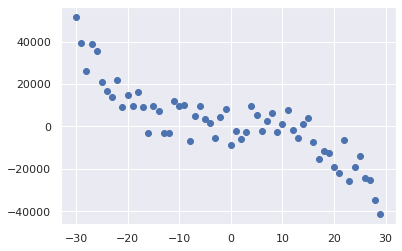

In [10]:
plt.scatter(X, y)

In [11]:
# Transform & Create X

def poly_trans(X, degree=2):
    if len(X.shape) == 1:
        X = X.unsqueeze(1)
    ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
    X_d = torch.cat([ones_col, X], axis=1)
    for i in range(1, degree):
        X_pow = X.pow(i + 1)
        X_d = torch.cat([X_d, X_pow], axis=1)
    return X_d

print(X)
print(poly_trans(X))

tensor([-30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
        -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
         -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
          6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
         18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.])
tensor([[  1., -30., 900.],
        [  1., -29., 841.],
        [  1., -28., 784.],
        [  1., -27., 729.],
        [  1., -26., 676.],
        [  1., -25., 625.],
        [  1., -24., 576.],
        [  1., -23., 529.],
        [  1., -22., 484.],
        [  1., -21., 441.],
        [  1., -20., 400.],
        [  1., -19., 361.],
        [  1., -18., 324.],
        [  1., -17., 289.],
        [  1., -16., 256.],
        [  1., -15., 225.],
        [  1., -14., 196.],
        [  1., -13., 169.],
        [  1., -12., 144.],
        [  1., -11., 121.],
        [  1., -10., 100.],
        [  

In [12]:
# (x^Tx)^{-1}x^Ty
def normal_equation(y_true, X):
    """Computes the normal equation
    
    Args:
        y_true: A torch tensor for the labels.
        X: A torch tensor for the data.
    """
    XTX_inv = (X.T.mm(X)).inverse()
    XTy = X.T.mm(y_true)
    beta = XTX_inv.mm(XTy)
    return beta

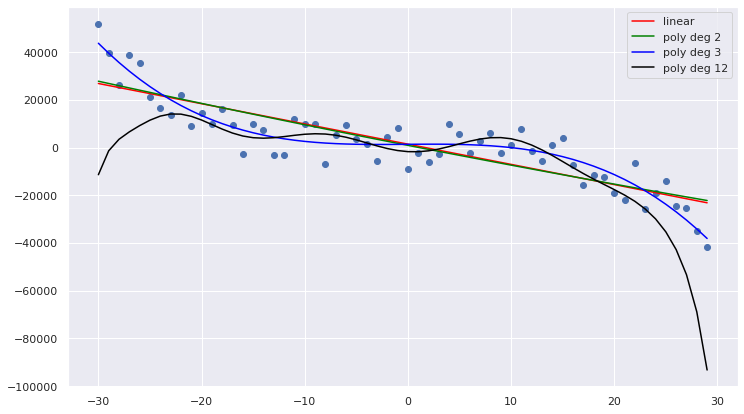

In [13]:
x1 = poly_trans(X, degree=1)
x2=  poly_trans(X, degree=2)
x3 = poly_trans(X, degree=3)
x12 = poly_trans(X, degree=12)
y_true = y.unsqueeze(1)
beta1 = normal_equation(y_true, x1)
beta2 = normal_equation(y_true, x2)
beta3 = normal_equation(y_true, x3)
beta12 = normal_equation(y_true, x12)
pred1 = x1.mm(beta1)
pred2 = x2.mm(beta2)
pred3 = x3.mm(beta3)
pred12 = x12.mm(beta12)

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(X,y)
plt.plot(X, pred1, c='red', label='linear')
plt.plot(X, pred2, c='green', label='poly deg 2')
plt.plot(X, pred3, c='blue', label='poly deg 3')
plt.plot(X, pred12, c='black', label = 'poly deg 12')

plt.legend(loc='best', ncol=1)  

In [14]:
### Regularization
# Ridge

def ridge_equation(y_true, X, lam=0):
    """Computes the normal equation
    
    Args:
        y_true: A torch tensor for the labels.
        X: A torch tensor for the data.
    """
    p = X.shape[1]
    XTX_inv = (X.T.mm(X)+lam*torch.diag(torch.ones(p))).inverse()
    XTy = X.T.mm(y_true)
    beta = XTX_inv.mm(XTy)
    return beta

torch.manual_seed(1)
p=10
X = 10 * torch.rand(100, p)
ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
X = torch.cat([ones_col, X], axis=1)

beta = torch.tensor([-4,1.5, -2., 0.332,3.,-2.,3.,4.,-10.,3.,0.5])
y = torch.mv(X, beta) + torch.randn(100)
y = y.unsqueeze(1)

### Training MSE
print('Single Trial (one sample training error)')
beta_R = ridge_equation(y, X, lam=1)
pred_R = X.mm(beta_R)
print('Ridge MSE', (y-pred_R).square().mean())


beta_LSE = ridge_equation(y,X,lam=0)
pred_LSE = X.mm(beta_LSE)
print('LSE MSE', (y-pred_LSE).square().mean())


### Test MSE
# Keep beta.hat, generate more (x,y)
X = 10 * torch.rand(100, p)
ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
X = torch.cat([ones_col, X], axis=1)

y = torch.mv(X, beta) + torch.randn(100)
y = y.unsqueeze(1)

# don't update beta.hat
pred_R = X.mm(beta_R)
print('\nSingle Trial (test error with 100 new obs. (one sample of size 100))')
print('Ridge MSE', (y-pred_R).square().mean())

pred_LSE = X.mm(beta_LSE)
print('LSE MSE', (y-pred_LSE).square().mean())

### Test MSE from more samples
torch.manual_seed(1)
niter = 200
Train_MSE_R = torch.zeros(1)
Train_MSE_LSE = torch.zeros(1)
MSE_R=torch.zeros(1)
MSE_LSE = torch.zeros(1)
for i in range(niter):
    X = 10 * torch.rand(100, p)
    ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
    X = torch.cat([ones_col, X], axis=1)
    y = torch.mv(X, beta) + torch.randn(100)
    y = y.unsqueeze(1)
    
    # get beta.hat from the training

    beta_R = ridge_equation(y, X, lam=1)
    beta_LSE = ridge_equation(y,X,lam=0)
    
    pred_R = X.mm(beta_R)
    pred_LSE = X.mm(beta_LSE)
    
    Train_MSE_R += (y-pred_R).square().mean() 
    Train_MSE_LSE += (y-pred_LSE).square().mean()
    
    # generate test set
    X = 10 * torch.rand(100, p)
    ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
    X = torch.cat([ones_col, X], axis=1)
    y = torch.mv(X, beta) + torch.randn(100)
    y = y.unsqueeze(1)
    
    # predict test y using the beta from training data
    pred_R = X.mm(beta_R)
    pred_LSE = X.mm(beta_LSE)
    
    MSE_R += (y-pred_R).square().mean() 
    MSE_LSE += (y-pred_LSE).square().mean()
    
print('\nTraining MSE from',niter,'samples')
print("Ridge", Train_MSE_R/niter)
print("LSE", Train_MSE_LSE/niter)


print('\nTest MSE from',niter,'samples')
print("Ridge", MSE_R/niter)
print("LSE", MSE_LSE/niter)

Single Trial (one sample training error)
Ridge MSE tensor(0.7464)
LSE MSE tensor(0.7203)

Single Trial (test error with 100 new obs. (one sample of size 100))
Ridge MSE tensor(1.2454)
LSE MSE tensor(1.2792)

Training MSE from 200 samples
Ridge tensor([0.9272])
LSE tensor([0.8935])

Test MSE from 200 samples
Ridge tensor([1.1697])
LSE tensor([1.1367])


In [15]:
# Ridge multicollinearity

def model_mult(n, beta):
    X = 10 * torch.rand(n, 10)
    X[:,1:3] = X[:,4:6] + 0.01* torch.randn(n,2)
    ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
    X = torch.cat([ones_col, X], axis=1)


    y = torch.mv(X, beta) + torch.randn(n)
    y = y.unsqueeze(1)
    return X, y

torch.manual_seed(1)
beta = torch.tensor([-4,9., -7.,10.,-5.2,3, 11.5,6.3,4.,3.,-9.])
X, y = model_mult(100, beta)

lam =10
print('Single Trial (one sample)')
beta_R = ridge_equation(y, X, lam=lam)
pred_R = X.mm(beta_R)
print('Ridge MSE', (y-pred_R).square().mean())


beta_LSE = ridge_equation(y,X,lam=0)
pred_LSE = X.mm(beta_LSE)
print('LSE MSE', (y-pred_LSE).square().mean())


niter = 200
Train_MSE_R = torch.zeros(1)
Train_MSE_LSE = torch.zeros(1)
MSE_R=torch.zeros(1)
MSE_LSE = torch.zeros(1)
beta = torch.tensor([-4,9., -7.,10.,-5.2,3, 11.5,6.3,4.,3.,-9.])

torch.manual_seed(1)
for i in range(niter):
    X, y = model_mult(100, beta)
    
    # get beta.hat from the training

    beta_R = ridge_equation(y, X, lam=lam)
    beta_LSE = ridge_equation(y,X,lam=0)
    
    pred_R = X.mm(beta_R)
    pred_LSE = X.mm(beta_LSE)
    
    Train_MSE_R += (y-pred_R).square().mean() 
    Train_MSE_LSE += (y-pred_LSE).square().mean()
    
    # generate test set
    X, y = model_mult(100, beta)
    
    # predict test y using the beta from training data
    pred_R = X.mm(beta_R)
    pred_LSE = X.mm(beta_LSE)
    
    MSE_R += (y-pred_R).square().mean() 
    MSE_LSE += (y-pred_LSE).square().mean()
    
print('\nTraining MSE from',niter,'samples')
print("Ridge", Train_MSE_R/niter)
print("LSE", Train_MSE_LSE/niter)


print('\nTest MSE from',niter,'samples')
print("Ridge", MSE_R/niter)
print("LSE", MSE_LSE/niter)

Single Trial (one sample)
Ridge MSE tensor(1.8786)
LSE MSE tensor(2.0638)

Training MSE from 200 samples
Ridge tensor([1.7486])
LSE tensor([50.5699])

Test MSE from 200 samples
Ridge tensor([2.0229])
LSE tensor([50.8492])


In [16]:
# Ridge k-fold CV
### Find the best λ

n = X.shape[0]; k=10
# k-fold IDEA
# 1. k-Partition 
folds = np.resize(range(k),n)
print('assign partition # for each index', folds)  # folds[i]: i-th observation's fold
folds = folds[torch.randperm(n)]  # shuffle the folds
print('add randomness: ', folds)
# 2. Extract indices for each partition

# partition 0
print("Test",np.where(folds==0))
print("Training",np.where(folds!=0))

# partition 1
print("Test",np.where(folds==1))
print("Training", np.where(folds!=1))

assign partition # for each index [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
add randomness:  [1 1 5 4 8 1 0 0 1 5 0 1 6 2 9 7 0 3 7 0 6 6 6 9 9 4 7 2 2 2 8 3 1 8 5 3 6
 0 7 6 4 7 9 7 2 5 9 3 3 9 5 9 1 5 7 7 8 0 6 8 5 4 1 3 0 9 8 7 4 3 4 4 3 4
 8 5 2 2 4 1 3 2 6 8 5 0 1 9 3 9 8 0 5 2 7 4 6 2 6 8]
Test (array([ 6,  7, 10, 16, 19, 37, 57, 64, 85, 91]),)
Training (array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 12, 13, 14, 15, 17, 18, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 92, 93, 94,
       95, 96, 97, 98, 99]),)
Test (array([ 0,  1,  5,  8, 11, 32, 52, 62, 79, 86]),)
Training (arra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


torch.Size([15, 2, 10])
tensor([[3.8766e+02, 2.5356e+02],
        [9.0285e+01, 2.5356e+02],
        [7.6548e+00, 2.5356e+02],
        [1.3556e+00, 2.5356e+02],
        [6.3262e-01, 2.5356e+02],
        [1.7127e+00, 2.5356e+02],
        [8.7456e+01, 2.5356e+02],
        [2.7527e+03, 2.5356e+02],
        [2.0596e+04, 2.5356e+02],
        [9.7911e+04, 2.5356e+02],
        [1.3838e+05, 2.5356e+02],
        [1.4389e+05, 2.5356e+02],
        [1.4446e+05, 2.5356e+02],
        [1.4452e+05, 2.5356e+02],
        [1.4452e+05, 2.5356e+02]])
tensor([4, 0])
best lambda: tensor(0.1000, dtype=torch.float64)


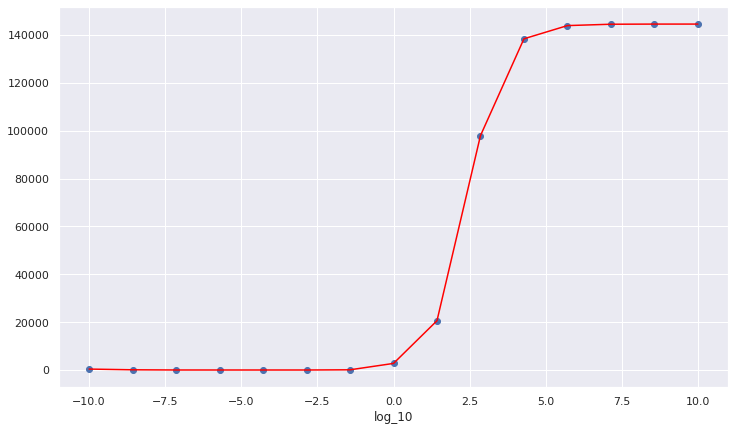

In [17]:
torch.manual_seed(1)
X, y = model_mult(100, beta)  # just a random sample -- without seed
# Let's use the above idea
# we will choose the lambda among
ngrid= 15
lambda_grid = torch.from_numpy(np.logspace(10^(-10),10,ngrid))

# set the partition
folds = torch.from_numpy(np.resize(range(k),n))
folds = folds[torch.randperm(n)]  # shuffle the folds
k_mse = torch.zeros(ngrid,2,k)
# compute MSE for each lambda
for i in range(ngrid):
    lam = lambda_grid[i]
    # compute the MSE using kfold
    for fold in range(k):
        train_indx = np.where(folds!=fold)
        test_indx =  np.where(folds==fold)
        y_train = y[train_indx]
        X_train = torch.squeeze(X[train_indx,:])
        y_test = y[test_indx]
        X_test =  torch.squeeze(X[test_indx,:])
        beta_R = ridge_equation(y_train, X_train, lam=lam)
        beta_LSE = ridge_equation(y_train, X_train, lam=0)
        test_pred_R = X_test.mm(beta_R)
        test_pred_LSE = X_test.mm(beta_LSE)
        k_mse[i,0,fold] = (y_test-test_pred_R).sum().square()/y_test.shape[0]
        k_mse[i,1,fold] = (y_test-test_pred_LSE).sum().square()/y_test.shape[0]

# take mean over k-fold
print(k_mse.shape)
out = torch.mean(k_mse, dim=2) 
print(out)
plt.scatter(np.linspace(-10,10,ngrid),out[:,0])
plt.xlabel('log_10')
plt.plot(np.linspace(-10,10,ngrid), out[:,0], c='red', label='linear')


print(torch.argmin(out,dim=0))
print("best lambda:",lambda_grid[3])

In [18]:
# Rerun the model

niter = 200
Train_MSE_R = torch.zeros(1)
Train_MSE_LSE = torch.zeros(1)
MSE_R=torch.zeros(1)
MSE_LSE = torch.zeros(1)
beta = torch.tensor([-4,9., -7.,10.,-5.2,3, 11.5,6.3,4.,3.,-9.])

torch.manual_seed(1)
lam = 0.1
for i in range(niter):
    X, y = model_mult(100, beta)
    
    # get beta.hat from the training

    beta_R = ridge_equation(y, X, lam=lam)
    beta_LSE = ridge_equation(y,X,lam=0)
    
    pred_R = X.mm(beta_R)
    pred_LSE = X.mm(beta_LSE)
    
    Train_MSE_R += (y-pred_R).square().mean() 
    Train_MSE_LSE += (y-pred_LSE).square().mean()
    
    # generate test set
    X, y = model_mult(100, beta)
    
    # predict test y using the beta from training data
    pred_R = X.mm(beta_R)
    pred_LSE = X.mm(beta_LSE)
    
    MSE_R += (y-pred_R).square().mean() 
    MSE_LSE += (y-pred_LSE).square().mean()
    
print('\nTraining MSE from',niter,'samples')
print("Ridge", Train_MSE_R/niter)
print("LSE", Train_MSE_LSE/niter)


print('\nTest MSE from',niter,'samples')
print("Ridge", MSE_R/niter)
print("LSE", MSE_LSE/niter)


Training MSE from 200 samples
Ridge tensor([1.0355])
LSE tensor([50.5699])

Test MSE from 200 samples
Ridge tensor([1.2268])
LSE tensor([50.8492])


In [19]:
### Classification basic
# Logistic Regression

iris = sns.load_dataset('iris')  # load iris dataset in seaborn
print('iris\n',iris.head())
X = iris.drop('species', axis=1)  # drop the species column(axis=1)
print('\n X \n',X.head())
y = iris['species']
print('\n y\n',y)
print('\n unique y\n',np.unique(y))

iris
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

 X 
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

 y
 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

 unique y
 ['setosa' 'versicolor'

In [20]:
# transform y - 0,1,2,..
from sklearn.preprocessing import LabelEncoder    
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) 
print(y)
print(np.unique(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 1 2]


In [21]:
#  split train/test from the dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)
print("X", X.shape)
print("y", y.shape)
print("X_train", X_train.shape)
print("y_test", y_test.shape)

print('y',np.unique(y, return_counts=True))
print('y train',np.unique(y_test, return_counts=True))
print('y test', np.unique(y_train, return_counts=True))  # stratify=y

X (150, 4)
y (150,)
X_train (105, 4)
y_test (45,)
y (array([0, 1, 2]), array([50, 50, 50]))
y train (array([0, 1, 2]), array([15, 15, 15]))
y test (array([0, 1, 2]), array([35, 35, 35]))


In [22]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression(penalty='none', multi_class='ovr') # one-vs-rest  
Logit.fit(X_train, y_train)
y_train_pred = Logit.predict(X_train)
y_test_pred = Logit.predict(X_test)
y_test_pred_proba=Logit.predict_proba(X_test)
print(y_test_pred[:5])
print(y_test_pred_proba[:5])
from sklearn.metrics import accuracy_score
print('test acc:', accuracy_score(y_test,y_test_pred))   
print('train acc:', accuracy_score(y_train,y_train_pred)) 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred)) 
print(Logit.coef_)

[2 0 0 1 1]
[[1.62425184e-13 7.90249658e-02 9.20975034e-01]
 [9.81128025e-01 1.88719751e-02 1.12628045e-23]
 [8.84199501e-01 1.15800499e-01 8.96706960e-24]
 [3.75750353e-12 5.91634598e-01 4.08365402e-01]
 [1.91398015e-07 9.99778761e-01 2.21047480e-04]]
test acc: 0.9777777777777777
train acc: 0.9523809523809523
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
[[  1.99396921   6.27889333 -10.03921378  -4.35345532]
 [ -1.58817478  -2.15128808   2.03645255  -3.03914125]
 [ -0.91225951  -6.39943973   8.16311802  16.04518619]]


In [23]:
# Regularization

Logit = LogisticRegression(C=1e2, multi_class='ovr', max_iter=300) # C= 1/λ,  one-vs-rest  
Logit.fit(X_train, y_train)
y_train_pred = Logit.predict(X_train)
y_test_pred = Logit.predict(X_test)
y_test_pred_proba=Logit.predict_proba(X_test)
print(y_test_pred[:5])
print(y_test_pred_proba[:5])
from sklearn.metrics import accuracy_score
print('test acc:', accuracy_score(y_test,y_test_pred))   
print('train acc:', accuracy_score(y_train,y_train_pred)) 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred)) 
print(Logit.coef_)

[2 0 0 1 1]
[[1.58069040e-07 8.08355630e-02 9.19164279e-01]
 [9.80729791e-01 1.92702092e-02 1.44032616e-16]
 [8.83660214e-01 1.16339786e-01 1.09742723e-16]
 [1.10125474e-05 6.10622960e-01 3.89366027e-01]
 [1.69869263e-04 9.94696666e-01 5.13346497e-03]]
test acc: 0.9777777777777777
train acc: 0.9523809523809523
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
[[-0.76671984  2.09831221 -4.68649463 -1.9094582 ]
 [-1.55950151 -2.15532289  1.99096135 -2.96098118]
 [-0.79884463 -4.12128048  6.23015952  9.97751475]]
